In [1]:
import pandas as pd
import cnets
from netgross.network import dirNetwork

import intensity_fill

%load_ext wurlitzer

In [2]:
df = pd.read_csv("ravdess_features.csv")

excluded = [
    "modality",
    "vocal_channel",
    "emotional_intensity",
    "statement",
    "repetition",
     "actor",
    "channels",
    "sample_width",
    "frame_rate",
    "frame_width",
    "sample_width",
    "stft_max",
    "frame_count",
    "length_ms",
    "mean",
    "max","min",
    # "kur","skew",
]
df.drop(columns=excluded, inplace=True)
df = intensity_fill.fill_intensity(df)
for field in ["sex", "emotion"]:
    df[field] = pd.Categorical(df[field]).codes

/home/djanloo/Desktop/dynamiting/intensity_fill.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.intensity[df.intensity.isna()] = I_from_std(df["std"][df.intensity.isna()])


normalization

In [3]:
from sklearn.preprocessing import MinMaxScaler

X = df.values

scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

Manifold knn representation

In [11]:
sparse_matrix = cnets.stupid_knn(X_minmax.tolist(), # note: first argument must be a python list
                                50)
print() # somehow jupyter notebooks mess up outputs
net = dirNetwork.from_sparse(sparse_matrix)



cnets - INFO: requested knn with k = 50 of 2452 objects in R22
|▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒|98 %2K
cnets - INFO: stupid_knn done.
Network has 2452 elements and 118793 links (density =  4.0 %)


In [16]:
net.initialize_embedding(dim=2)
# note: first argument is a list of attractive factors, the second a list of repulsive ones and third a list of steps
net.cMDE([1.0, 0.5, 0.1], [0.05, 0.01, 0.0], [5, 10, 300])

cnets - INFO: Generating network...	Done.
cnets - INFO: Random initialization in R2...	Done.
cnets - INFO: starting MDE with eps = 1.000, neg_eps = 0.050, Nsteps = 5
|▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒           |80 % (D = 615.4894)K
cnets - INFO: MDE end
cnets - INFO: starting MDE with eps = 0.500, neg_eps = 0.010, Nsteps = 10
|▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒     |90 % (D = 305.6456)
cnets - INFO: MDE end
cnets - INFO: starting MDE with eps = 0.100, neg_eps = 0.000, Nsteps = 300
|▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒|99 % (D = 8.5178)KK
cnets - INFO: MDE end



cnets - WARNING: link(1012,1887) skipped - Distance must be a positive number (0.000000)

cnets - WARNING: link(1887,1012) skipped - Distance must be a positive number (0.000000)

cnets - WARNING: link(1887,1012) skipped - Distance must be a positive number (0.000000)

cnets - WARNING: link(1012,1887) skipped - Distance must be a positive number (0.000000)


Plot started:
Getting graphics..	Done.
Updating scatter..	Done.


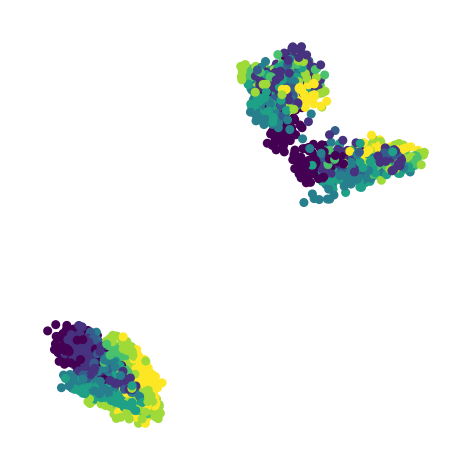

In [17]:
from netgross import netplot
from matplotlib import pyplot as plt

net.values = df.emotion
netplot.plot_lines = False # the denser the network, the more time-expensive plotting lines is
netplot.line_kwargs['lw'] = 0.4
netplot.plot_net(net)
plt.show()